<a href="https://colab.research.google.com/github/PeterShiaush/ColabRepo/blob/main/week02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **第二週：視覺處理與邏輯控制 (Vision & Logic)**

**第一節 (W2-S1)：OpenCV 基礎與模組**

* **0-10 min: Import 的概念**
* 類比：Python 是工具箱，`import cv2` 就像是拿出一把「視覺專用的瑞士刀」。


* **10-35 min: OpenCV 實戰**
* 上傳圖片到 Colab (左側資料夾)。
* 程式碼：



* **觀念植入**：圖片其實就是一堆數字的排列 (矩陣/陣列)。


* **35-45 min: 修改變數**
* 嘗試修改 `img` 變數 (例如裁切或變色)，觀察變數改變如何影響輸出。


##### **0-10 min: Import 的概念**
*   類比：Python 是工具箱，import cv2 就像是拿出一把「視覺專用的瑞士刀」。


In [ ]:
# ==========================================
# 課堂實戰：認識 Import 與工具箱
# ==========================================

# --- 步驟 0：從網路下載素材 ---
# 用 !wget 在網路領取圖片檔，另存為: test.jpg
# 圖片來源：https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg
!wget -q -O test.jpg https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg
print("--- 步驟 0：檔案空空，但我們已用 !wget 取得檔案: test.jpg ---")


print("\n--- 步驟 1：兩手空空的 Python ---")
# 現在叫 Python 去讀取 cv2.imread('test.jpg') 叫做 test.jpg 的圖片。
# 【教學任務】：請直接按下執行，看看會發生什麼事？
# (結果：不會成功，程式會因為 NameError 停在這裡。)
# 【解題】：看完報錯後，請大家在「下面這行」的最前面加入 '#'，把它變成註解，再重新執行一次！

img = cv2.imread('test.jpg')


print("\n--- 步驟 2：去倉庫拿工具箱 ---")
# Python 預設是兩手空空的。
# 我們必須把名為 cv2 (OpenCV) 的「視覺瑞士刀」 import (拿進來)，準備使用！

import cv2

print("成功裝備視覺瑞士刀！")

# 我們來檢查一下這把瑞士刀的出廠編號 (模組版本)
print("我們使用的 OpenCV 版本是：", cv2.__version__)

##### **10-35 min: OpenCV 實戰**
* 上傳圖片到 Colab (左側資料夾)。
* 程式碼如下:


In [ ]:
# ==========================================
# 課堂實戰：看見世界的第一眼 (讀取與顯示圖片)
# ==========================================

# --- 步驟 1：準備素材 (Linux 指令) ---
# 用 !wget 由網址下載圖片，並直接存到 Colab (左側資料夾)，命名為 test.jpg。
!wget -q -O test.jpg https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg


# --- 步驟 2：拿出工具箱 (Python 模組) ---
import cv2
from google.colab.patches import cv2_imshow # 這是 Colab 專用的顯示螢幕 (標準的 cv2.imshow 在這會當機)


# --- 步驟 3：讀取檔案進變數 ---
# Python 已經裝備好 cv2 (視覺瑞士刀)，準備使用！
# 使用 cv2.imread('test.jpg') 讀取圖片，並把整張圖片存進名為 img 的「變數」中。

# 💡【工程師的靈魂拷問】：
# 「變數」名稱，可以隨便取名為 iii, mmm, aaa, x, y, zz 或 bbb 嗎？
# 答案是：可以，Python 不會當機。但「非常不合適」！
# 在業界，變數命名必須「見名知義」。img 是 image(圖片) 的縮寫。
# 如果你取名叫 aaa，三天後連你自己都不知道 aaa 裡面裝的是什麼。
img = cv2.imread('test.jpg')


# --- 步驟 4：顯示圖片 ---
# 呼叫 cv2_imshow，把存放在 img 變數裡的畫面 show 出來！
cv2_imshow(img)

「各位同學，『**變數**』就像是一個一個的**置物箱**。
如果你搬家的時候，在紙箱上面寫『**aaa**』、『**bbb**』、『**ccc**』，等你搬到新家要找吹風機的時候，你是不是每個箱子都要打開來看？這就是寫**爛程式碼**的感覺！
專業的工程師，會在箱子上貼上『**廚房餐具**』、『**浴室用品**』。這就是為什麼我們要把這個裝著圖片的變數，命名為 **img** 或 **photo** 的原因！」

*   **觀念植入**：圖片其實就是一堆數字的排列 (矩陣/陣列)。



In [18]:
# ==========================================
# 駭客任務：看透圖片的真面目 (矩陣與數字)
# ==========================================

# 💡 觀念植入：圖片其實就是一堆數字的排列 (矩陣/陣列)
# 現在 img 變數裡裝著剛剛讀取的圖片。我們來對它進行「全身檢查」！

# --- 步驟 1：確認圖片的真實身分 ---
# 使用 type() 函數，問 Python 這個 img 到底是什麼資料型態？
print("--- 步驟 1：img 的真實身分 ---")
print("電腦眼中的 img 是：", type(img))
# 預期結果會看到 'numpy.ndarray'。
# ndarray 的意思是 N-dimensional array (多維陣列/矩陣)。
# 證明了它根本不是圖片，而是一個龐大的數學矩陣！


# --- 步驟 2：量測這座「數字金字塔」的大小 ---
# 使用 .shape 屬性，可以告訴我們這個陣列的形狀 (高度, 寬度, 色彩通道數)
print("\n--- 步驟 2：圖片的形狀 ---")
print("這張圖片的大小 (高, 寬, 顏色層)：", img.shape)
# 預期結果可能是 (720, 1280, 3)。
# 代表這張圖是由 720 列(Rows)、1280 行(Columns) 組成，且每個格子裡疊了 3 個數字 (BGR)。


# --- 步驟 3：掀開底牌，直接看像素數字！ ---
# 幾十萬個數字印出來會當機，我們只「偷看」圖片最左上角 3x3 (共 9 個像素) 的一小塊區域。每個像素，格子裡疊了 3 個數字 (BGR)。
print("\n--- 步驟 3：左上角 3x3 像素的真實數字 ---")
print(img[0:3, 0:3])

--- 步驟 1：img 的真實身分 ---
電腦眼中的 img 是： <class 'numpy.ndarray'>

--- 步驟 2：圖片的形狀 ---
這張圖片的大小 (高, 寬, 顏色層)： (720, 1280, 3)

--- 步驟 3：左上角 3x3 像素的真實數字 ---
[[[38 48 72]
  [40 50 74]
  [40 51 73]]

 [[37 47 71]
  [37 47 71]
  [37 48 70]]

 [[41 51 75]
  [39 49 73]
  [37 48 70]]]


拆解「列 (Row)」
印出來的結構分為三大塊，每一塊就是一列水平的像素：

第一列 (Y=0): [[**38 48 72**]  [**40 50 74**]  [**40 51 73**]]

第二列 (Y=1): [[37 47 71]  [37 47 71]  [37 48 70]]

第三列 (Y=2): [[41 51 75]  [39 49 73]  [37 48 70]]

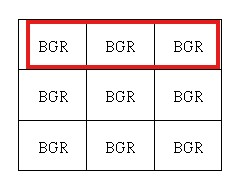

#### **35-45 min: 修改變數**
*   嘗試修改 img 變數 (例如裁切或變色)，觀察變數改變如何影響輸出。


--- 任務 1：裁切成功！這是一個新的小變數 face ---


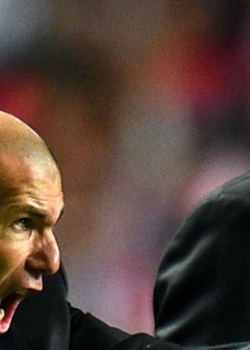


--- 任務 2：塗鴉成功！原本的變數 img 已經被永久改變了 ---


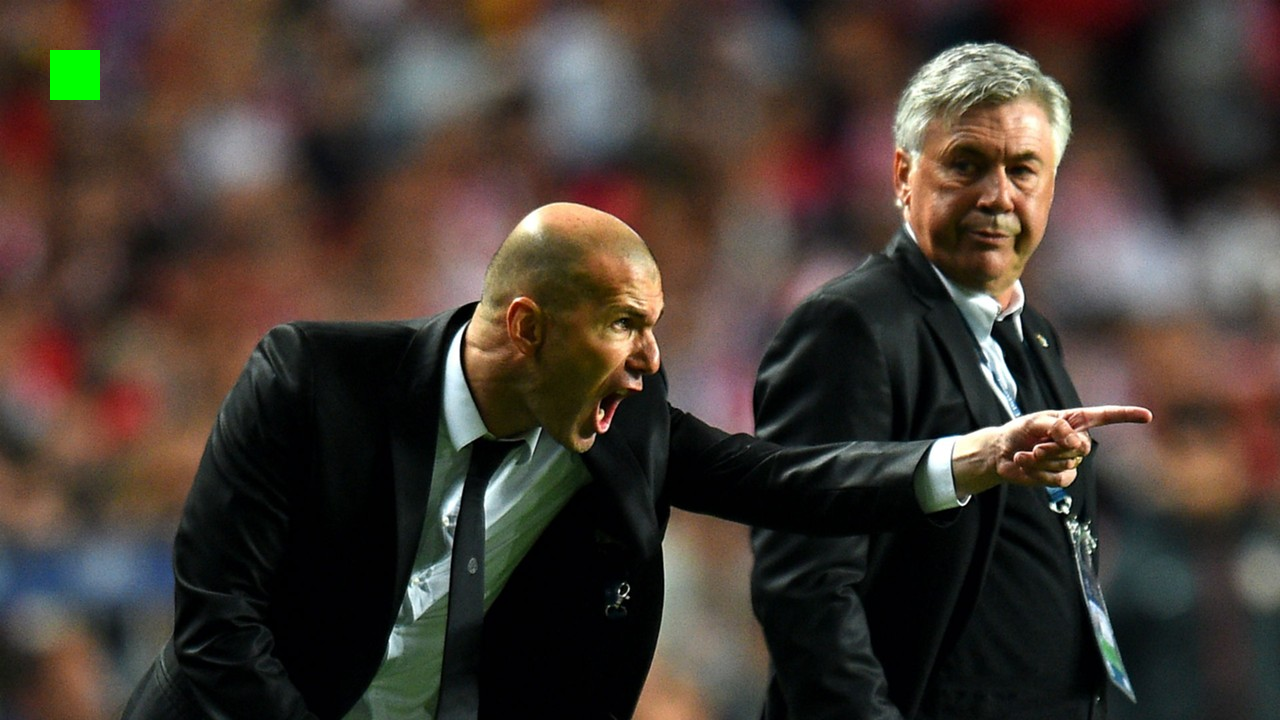

In [17]:
# ==========================================
# 課堂實戰：數位外科手術 (修改變數：裁切與變色)
# ==========================================

# (保險起見，我們先重新讀取一次乾淨的圖片，以免剛剛玩壞了)
img = cv2.imread('test.jpg')


# --- 任務 1：把左邊男人的臉「切」下來 (變數裁切 Slicing) ---

# 💡【自然組專屬．座標陷阱警告】：
# 數學課的座標是 (x, y)，但在電腦矩陣裡，順序是 [列(Y), 行(X)]！
# 想像你在切一塊方形蛋糕：先決定「從上往下(Y)」切哪裡，再決定「從左往右(X)」切哪裡。

# 我們把 Y軸(上下) 100~450，X軸(左右) 600~850 的範圍「切」出來，存入新變數 face
face = img[100:450, 600:850]

print("--- 任務 1：裁切成功！這是一個新的小變數 face ---")
cv2_imshow(face) # 秀出被切下來的臉


# --- 任務 2：圖片塗鴉 (修改變數內的數字) ---

# 💡【自然組專屬．色彩陷阱警告】：
# 光的三原色是 RGB (紅綠藍)，但 OpenCV 的歷史傳統是顛倒的 BGR (藍綠紅)！
# 顏色數值範圍是 0 ~ 255。
# (0, 255, 0) 代表：藍燈關閉(0)、綠燈開到最亮(255)、紅燈關閉(0) -> 所以是純綠色！

# 我們直接修改原本的 img 變數。
# 將 Y軸 50~200，X軸 100~400 的這個區塊，裡面所有的數字都強迫換成 (0, 255, 0)
img[50:100, 50:100] = (0, 255, 0)

print("\n--- 任務 2：塗鴉成功！原本的變數 img 已經被永久改變了 ---")
cv2_imshow(img) # 秀出被塗鴉後的原圖